# Stock Price machine Learning

-----------------------------------
## Historical Data Pull for Amazon

In [1]:
import pandas as pd
from alpaca_trade_api.rest import REST, TimeFrame
from fredapi import Fred
import yfinance as yf
import datetime
import pandas_ta as ta

# Keys
ALPACA_API_KEY = ''
ALPACA_API_SECRET = ''
BASE_URL = 'https://api.alpaca.markets'
FRED_API_KEY = ''
STOCK_SYMBOL = 'AMZN'
ADDITIONAL_SYMBOLS = ['AAPL', 'MSFT', 'GOOGL', 'META', 'WMT', 'BABA']

# Initialize the Alpaca and FRED API
api = REST(ALPACA_API_KEY, ALPACA_API_SECRET, BASE_URL)
fred = Fred(api_key=FRED_API_KEY)

# Function to fetch minute-level stock data from Alpaca
def fetch_minute_stock_data(ticker, start_date, end_date):
    all_data = pd.DataFrame()
    while start_date < end_date:
        chunk_end_date = start_date + datetime.timedelta(days=30)
        if chunk_end_date > end_date:
            chunk_end_date = end_date
        print(f'Fetching data from {start_date.strftime("%Y-%m-%d")} to {chunk_end_date.strftime("%Y-%m-%d")}')
        
        data = api.get_bars(
            ticker, 
            TimeFrame.Minute, 
            start=start_date.strftime('%Y-%m-%d'), 
            end=chunk_end_date.strftime('%Y-%m-%d'), 
            adjustment='raw',
            limit= None,
            feed='iex'
        ).df

        all_data = pd.concat([all_data, data])
        start_date = chunk_end_date

    all_data.index = pd.to_datetime(all_data.index)
    return all_data

# Fetch minute-level stock data for the main symbol
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)
merged_df = fetch_minute_stock_data(STOCK_SYMBOL, start_date, end_date)

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [2]:
df=merged_df
df.shape

NameError: name 'merged_df' is not defined

-----------------------------------
### Adjusted Close Plot for Visual

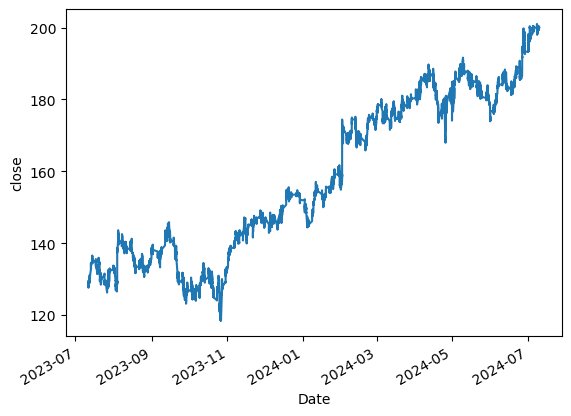

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

df['close'].plot()
plt.xlabel('Date')
plt.ylabel('close')
plt.show()

-----------------------------------
## Technical Indicator Calculations

In [ ]:
df.ta.indicators()

In [7]:
# Calculate Moving Averages
df.ta.sma(length=10, append=True)
df.ta.sma(length=2, append=True)
df.ta.sma(length=5, append=True)
df.ta.sma(length=7, append=True)
df.ta.sma(length=14, append=True)
df.ta.sma(length=30, append=True)
df.ta.sma(length=50, append=True)
df.ta.sma(length=200, append=True)

# Calculate Bollinger Bands
df.ta.bbands(length=20, append=True) #volatility

# Calculate RSI
df.ta.rsi(length=14, append=True)

# Calculate MACD 
df.ta.macd(fast=12, slow=26, append=True)

print(df)

                             close     high      low  trade_count     open  \
timestamp                                                                    
2023-07-11 13:30:00+00:00  127.695  128.015  127.580           88  127.715   
2023-07-11 13:31:00+00:00  127.630  127.630  127.440           54  127.600   
2023-07-11 13:32:00+00:00  127.595  127.720  127.485           74  127.650   
2023-07-11 13:33:00+00:00  127.700  127.720  127.570           70  127.620   
2023-07-11 13:34:00+00:00  128.080  128.150  127.700           36  127.700   
...                            ...      ...      ...          ...      ...   
2024-07-09 19:56:00+00:00  199.400  199.410  199.290           48  199.310   
2024-07-09 19:57:00+00:00  199.410  199.430  199.335           40  199.335   
2024-07-09 19:58:00+00:00  199.405  199.450  199.400           77  199.445   
2024-07-09 19:59:00+00:00  199.340  199.440  199.310           96  199.365   
2024-07-10 12:31:00+00:00  199.980  199.980  199.980            

### Good Data Pull so far with calculations 
More Technical Indicators can be added as we go. Now for some plotting to get some visuals of what the data looks like.

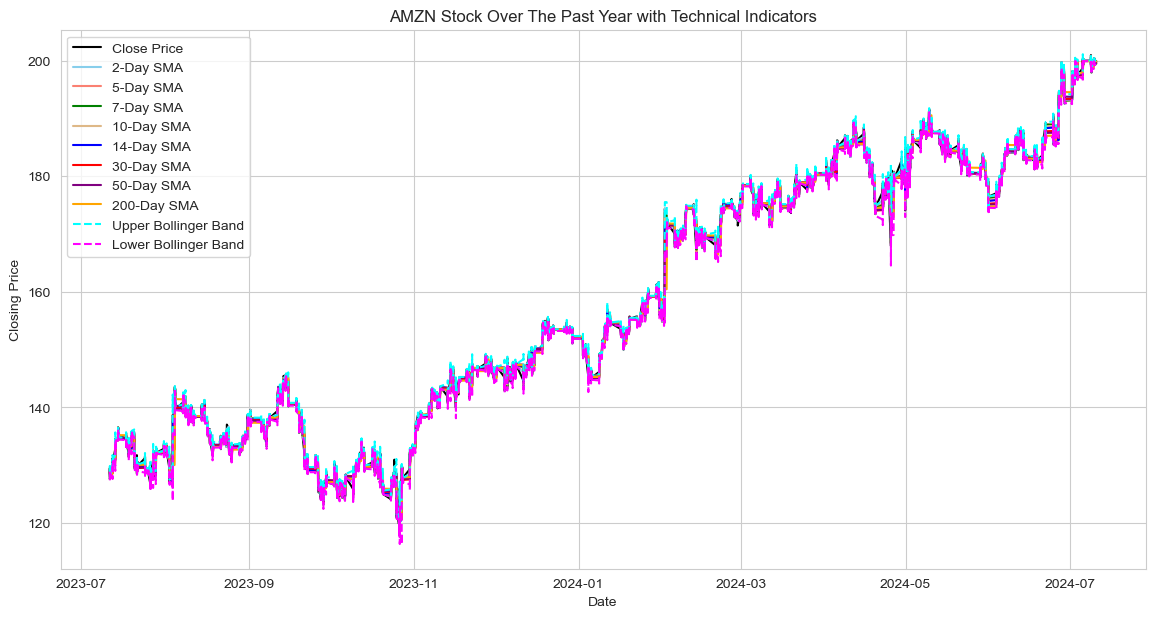

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize =(14,7))
# Moving Aveerages
plt.plot(df.index, df['close'], label = 'Close Price', color = 'black')
plt.plot(df.index,df['SMA_2'],label = '2-Day SMA', color = 'skyblue')
plt.plot(df.index,df['SMA_5'],label = '5-Day SMA', color = 'salmon')
plt.plot(df.index,df['SMA_7'],label = '7-Day SMA', color = 'green')
plt.plot(df.index,df['SMA_10'],label = '10-Day SMA', color = 'burlywood')
plt.plot(df.index, df['SMA_14'],label = '14-Day SMA',color = 'blue')
plt.plot(df.index, df['SMA_30'],label = '30-Day SMA', color = 'red')
plt.plot(df.index,df['SMA_50'], label = '50-Day SMA',color = 'purple')
plt.plot(df.index, df['SMA_200'], label = '200-Day SMA',color = 'orange')
# Bollinger Bands
plt.plot(df.index,df['BBU_20_2.0'],label = 'Upper Bollinger Band',color = 'cyan',linestyle = '--')
plt.plot(df.index,df['BBL_20_2.0'],label = 'Lower Bollinger Band',color = 'magenta',linestyle = '--')

plt.title('AMZN Stock Over The Past Year with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Adding some more technical indicators

Pandas ta package not working synergistically with inputted close column for the dataframe.
Custom function below drawn from pandas_ta fixes the issue. 

#### Adding in the indicators

In [ ]:
# Full technical indicators minus other previous additions
df.ta.aberration(append=True)     # Aberration: Measures volatility
df.ta.above(above_value=160, append=True)  # Check if value is above 100
df.ta.accbands(append=True)      # Accumulation/Distribution Bands: Measure volatility
df.ta.ad(append=True)            # Accumulation/Distribution: Volume indicator
df.ta.adosc(append=True)         # Accumulation/Distribution Oscillator: Volume indicator
df.ta.adx(append=True)           # Average Directional Index: Measures trend strength
df.ta.alma(append=True)          # Arnaud Legoux Moving Average: Smoothed price data
df.ta.amat(append=True)          # Adaptative Moving Average Trend: Identifies trends
df.ta.ao(append=True)            # Awesome Oscillator: Measures momentum
df.ta.aobv(append=True)          # Above On Balance Volume: Volume indicator
df.ta.apo(append=True)           # Absolute Price Oscillator: Measures momentum
df.ta.aroon(append=True)         # Aroon: Identifies trend changes
df.ta.atr(append=True)           # Average True Range: Measures volatility
df.ta.below(below_value=50, append=True)  # Check if value is below 50
df.ta.bias(append=True)          # Bias: Measures deviation from a specified average
df.ta.bop(append=True)           # Balance of Power: Momentum indicator
df.ta.brar(append=True)          # (Bullish/Bearish) Rectangular Area: Momentum indicator
df.ta.cci(append=True)           # Commodity Channel Index: Identifies overbought/oversold conditions
df.ta.cfo(append=True)           # Chande Forecast Oscillator: Momentum indicator
df.ta.cg(append=True)            # Center of Gravity: Identifies turning points
df.ta.cmo(append=True)           # Chande Momentum Oscillator: Measures momentum
df.ta.coppock(append=True)       # Coppock Curve: Long-term momentum indicator
df.ta.cti(append=True)           # Closing Tick Indicator: Momentum indicator
df.ta.dm(append=True)           # Directional Movement: Measures trend direction
df.ta.er(append=True)           # Efficiency Ratio: Measures trend strength
df.ta.eri(append=True)          # Elder Ray Index: Combines bull and bear power
df.ta.fisher(append=True)       # Fisher Transform: Converts prices into a Gaussian normal distribution
df.ta.inertia(append=True)      # Inertia: Measures rate of change and direction
df.ta.kdj(append=True)          # Stochastic Oscillator: Measures momentum
df.ta.kst(append=True)          # Know Sure Thing (KST): Smoothed rate of change
df.ta.mom(append=True)          # Momentum: Measures rate of change in prices
df.ta.pgo(append=True)          # Percentage Price Oscillator: Measures momentum
df.ta.ppo(append=True)          # Price Percentage Oscillator: Measures momentum
df.ta.psl(append=True)          # Polarized Fractal Efficiency: Detects trends
df.ta.pvo(append=True)          # Percentage Volume Oscillator: Measures volume momentum
df.ta.qqe(append=True)          # Quantitative Qualitative Estimation: Identifies trends
df.ta.roc(append=True)          # Rate of Change: Measures momentum
df.ta.rsx(append=True)          # Relative Strength Index Smoothed: Smoothed RSI
df.ta.rvgi(append=True)          # Relative Vigor Index (RVI): Measures momentum
df.ta.slope(append=True)         # Slope: Measures the rate of change of a series
df.ta.smi(append=True)           # Stochastic Momentum Index (SMI): Measures momentum
df.ta.squeeze(append=True)       # Squeeze Momentum Indicator: Detects periods of low volatility
df.ta.squeeze_pro(append=True)   # Squeeze Pro: Enhanced version of Squeeze Momentum Indicator
df.ta.stc(append=True)           # Schaff Trend Cycle Indicator: Identifies market trends      
df.ta.stochrsi(append=True)      # Stochastic RSI: Combination of Stochastic Oscillator and RSI
df.ta.td_seq(append=True)        # TD Sequential: Detects trend exhaustion
df.ta.trix(append=True)          # Triple Exponential Average: Smoothed moving average
df.ta.tsi(append=True)           # True Strength Index: Measures trend direction
df.ta.uo(append=True)            # Ultimate Oscillator: Measures buying and selling pressure
df.ta.willr(append=True)        # Williams %R: Identifies overbought or oversold conditions
df.ta.dema(append=True)         # Double Exponential Moving Average (DEMA): Smoother average with emphasis on recent prices
df.ta.ema(append=True)          # Exponential Moving Average (EMA): Responsive to recent price changes
df.ta.fwma(append=True)         # Fixed Weighted Moving Average (FWMA): Evenly weighted moving average
df.ta.hilo(append=True)         # Highest High and Lowest Low (HILO): Identifies highest high and lowest low
df.ta.hl2(append=True)          # High-Low Midpoint (HL2): Midpoint between high and low prices
df.ta.hlc3(append=True)         # High-Low-Close Average (HLC3): Average of high, low, and close prices
df.ta.hma(append=True)          # Hull Moving Average (HMA): Reduced lag moving average
df.ta.hwma(append=True)         # Heikin Ashi Weighted Moving Average (HWMA): Smoothed moving average using Heikin Ashi candles
df.ta.ichimoku(append=True)     # Ichimoku Cloud: Trend-following indicator showing support, resistance, momentum, and trend direction
df.ta.jma(append=True)          # Jurik Moving Average (JMA): Dynamically smoothed moving average
df.ta.kama(append=True)         # Kaufman Adaptive Moving Average (KAMA): Adjusts sensitivity to market volatility
df.ta.linreg(append=True)       # Linear Regression: Fits a linear regression line to price data
df.ta.midpoint(append=True)     # Midpoint Price: Calculates the midpoint of high and low prices
df.ta.ohlc4(append=True)        # OHLC4 Average: Calculates the average of open, high, low, and close prices
df.ta.pwma(append=True)         # Volume Weighted Moving Average (PWMA): Moving average weighted by volume
df.ta.sinwma(append=True)       # Sine Weighted Moving Average (SINWMA): Moving average with sine weighting
df.ta.ssf(append=True)          # Sine Smoothed Filter (SSF): Smoothed version of the sine wave
df.ta.supertrend(append=True)   # Supertrend: Trend following indicator based on volatility
df.ta.t3(append=True)           # T3 Moving Average: Adaptive moving average
df.ta.tema(append=True)         # Triple Exponential Moving Average (TEMA): Smoother and more responsive moving average
df.ta.trima(append=True)        # Triangular Moving Average (TRIMA): Smoother moving average
df.ta.vidya(append=True)        # VIDYA (Variable Index Dynamic Average): Adjusts average based on market volatility
df.ta.vwap(append=True)         # Volume Weighted Average Price (VWAP): Average price weighted by volume
df.ta.vwma(append=True)         # Volume Weighted Moving Average (VWMA): Moving average weighted by volume
df.ta.wcp(append=True)          # Weighted Close Price (WCP): Weighted average of high, low, and close prices
df.ta.zlma(append=True)         # Zero Lag Moving Average (ZLMA): Moving average with reduced lag
df.ta.log_return(append=True)   # Logarithmic return of the series
df.ta.percent_return(append=True)  # Percentage return of the series
df.ta.entropy(append=True)      # Shannon entropy of the series
df.ta.kurtosis(append=True)     # Kurtosis of the series
df.ta.mad(append=True)          # Mean absolute deviation of the series
df.ta.median(append=True)       # Median of the series
df.ta.quantile(append=True)     # Quantile (percentile) of the series
df.ta.skew(append=True)         # Skewness of the series
df.ta.stdev(append=True)        # Standard deviation of the series
df.ta.tos_stdevall(append=True)  # Standard deviation of the total return series
df.ta.variance(append=True)     # Variance of the series
df.ta.zscore(append=True)       # Z-score of the series
df.ta.adx(append=True)          # Average Directional Movement Index (ADX): Measures trend strength
df.ta.amat(append=True)         # Adaptive Moving Average (AMAT): Adjusts to market conditions
df.ta.aroon(append=True)        # Aroon Oscillator: Identifies trend changes and strength
df.ta.chop(append=True)         # Choppiness Index (CHOP): Measures market trendiness
df.ta.cksp(append=True)         # Chande Kroll Stop (CKSP): Provides stop levels for trading
df.ta.decay(append=True)        # Linear decay of the series: Weighted average over time
df.ta.decreasing(append=True)   # Boolean indicating if series is decreasing
df.ta.dpo(append=True)          # Detrended Price Oscillator (DPO): Identifies cycles
df.ta.increasing(append=True)   # Boolean indicating if series is increasing
df.ta.long_run(append=True)     # Long Run Momentum (LRM): Long-term trend strength
df.ta.psar(append=True)         # Parabolic Stop and Reverse (PSAR): Provides stop levels
df.ta.qstick(append=True)       # QStick: Measures candlestick momentum
df.ta.short_run(append=True)    # Short Run Momentum (SRM): Short-term trend strength
df.ta.tsignals(append=True)     # Trending Signals (TSIGNALS): Identifies trend direction
df.ta.ttm_trend(append=True)    # TTM Trend: Indicates trend direction based on volatility
df.ta.vhf(append=True)          # Vertical Horizontal Filter (VHF): Measures market trendiness
df.ta.vortex(append=True)       # Vortex Indicator: Identifies trend changes
df.ta.xsignals(append=True)     # Cross Signals (XSIGNALS): Identifies cross points
df.ta.donchian(append=True)    # Donchian Channels: Identifies potential support and resistance levels
df.ta.hwc(append=True)         # Hull Moving Average (HWC): Fast and responsive moving average
df.ta.kc(append=True)          # Keltner Channels (KC): Similar to Bollinger Bands, uses average true range
df.ta.massi(append=True)       # Mass Index (MASSI): Identifies reversals based on range expansion
df.ta.natr(append=True)        # Normalized Average True Range (NATR): Normalizes ATR for comparison
df.ta.pdist(append=True)       # Price Distribution: Histogram of closing prices
df.ta.rvi(append=True)         # Relative Volatility Index (RVI): Measures volatility
df.ta.thermo(append=True)      # Thermometer: Measures the speed and direction of price movements
df.ta.true_range(append=True)  # True Range: Measures volatility and price movement
df.ta.ui(append=True)          # Ulcer Index (UI): Measures downside volatility

In [10]:
df.shape

(98687, 207)

## Other stock and external index data pull

In [25]:
# Function to fetch company financials from Yahoo Finance
def fetch_company_financials(symbol):
    ticker = yf.Ticker(symbol)
    financials = ticker.financials
    balance_sheet = ticker.balance_sheet
    cashflow = ticker.cashflow
    return financials, balance_sheet, cashflow

# Fetch company financials for the main symbol
financials, balance_sheet, cashflow = fetch_company_financials(STOCK_SYMBOL)

# Extract relevant financial data for the main symbol
revenue = financials.loc['Total Revenue'].values[0]
net_income = financials.loc['Net Income'].values[0]
gross_profit = financials.loc['Gross Profit'].values[0]
total_debt = balance_sheet.loc['Total Liabilities Net Minority Interest'].values[0]
operating_cash_flow = cashflow.loc['Operating Cash Flow'].values[0]

# Add financial data for the main symbol to the merged dataframe
merged_df['Revenue'] = revenue
merged_df['Net_Income'] = net_income
merged_df['Gross_Profit'] = gross_profit
merged_df['Total_Debt'] = total_debt
merged_df['Operating_Cash_Flow'] = operating_cash_flow

# Function to download and process additional stock data from Yahoo Finance
def download_and_process_data(symbol, start_date, end_date, interval='1m'):
    df = api.get_bars(
        symbol, 
        TimeFrame.Minute, 
        start=start_date.strftime('%Y-%m-%d'), 
        end=end_date.strftime('%Y-%m-%d'),
        adjustment='raw',
        limit= None,
        feed='iex'
    ).df
    if not df.empty:
        df = df[['close']].rename(columns={'close': symbol})
        return df
    else:
        print(f"Failed to fetch data or no data available for {symbol}")
        return None

# Fetch and append close prices for additional symbols
additional_close_dfs = []
for symbol in ADDITIONAL_SYMBOLS:
    additional_data = download_and_process_data(symbol, start_date, end_date, interval='1m')
    if additional_data is not None:
        additional_close_dfs.append(additional_data)

# Merge additional close prices into the main dataframe
if additional_close_dfs:
    for df in additional_close_dfs:
        merged_df = pd.merge(merged_df, df, left_index=True, right_index=True, how='outer')

# Display the merged DataFrame
print(merged_df)

# Save to CSV if needed
merged_df.to_csv(f'{STOCK_SYMBOL}_minute_data_with_financials_and_closes.csv')

NameError: name 'STOCK_SYMBOL' is not defined

In [12]:
merged_df.shape

(101871, 218)

## Data Cleaning

In [1]:
from IPython.display import display, HTML


def dataframe_to_html(df):
    """
    Convert a DataFrame to an HTML table.

    Parameters:
    df (pd.DataFrame): The DataFrame to convert.

    Returns:
    str: The HTML representation of the DataFrame.
    """
    # Convert the DataFrame to an HTML table
    html = df.to_html()
    
    # Return the HTML string
    return html



def htmldf(df):
    """
    Display a DataFrame as an HTML table in a Jupyter notebook.

    Parameters:
    df (pd.DataFrame): The DataFrame to display.
    """
    # Convert the DataFrame to an HTML table
    html = dataframe_to_html(df)
    
    # Display the HTML table
    display(HTML(html))



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import pandas as pd
import numpy as np

df_new=pd.read_csv('AMZN_minute_data_with_financials_and_closes.csv')


-----------------------------
### Data types of all columns

In [3]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])
df_new.set_index('timestamp', inplace=True) 
dtypes_df = df_new.dtypes.to_frame(name='Data Type')
htmldf(dtypes_df)

In [4]:
# Top 5 viewable rows for each column
htmldf(df_new.head())

--------------------
#### Given that none of the columns are categorical columns, there will not be any frequency distrubutions for variables.

----------------
### Getting Descriptions and summary statistics of all columns of all the columns

In [5]:
htmldf(df_new.describe())

--------------------------
Because there are missing values up to row 200 for some columns and missing information in between some rows because of weekends and other missing data we drop the rows where NA for the closing price and use backfill for the earlier rows and forward fill for the rows in between.

In [6]:
df_new.isna().sum().sum()

1332104

In [7]:
# Dropping weekends and aftermarket data for amazon closing price.
df_new.dropna(subset=['close'])

# Backfill for rows up to 200
df_new.loc[df_new.index <= df_new.index[200]] = df_new.loc[df_new.index <= df_new.index[200]].bfill()

# Forward fill from rows 200 onwards
df_new.loc[df_new.index > df_new.index[200]] = df_new.loc[df_new.index > df_new.index[200]].ffill()

# Calculate the sum of NaN values for each column
na_counts = df_new.isna().sum()

# Filter columns where the sum of NaN values is not zero
columns_with_nans = na_counts[na_counts != 0].index.tolist()

print('NaN Columns:')
print(columns_with_nans)

NaN Columns:
['QQEs_14_5_4.236', 'TD_SEQ_UP', 'TD_SEQ_DN', 'HILOs_13_21', 'SUPERTs_7_3.0', 'PSARs_0.02_0.2', 'META']


------------------------------------
##### Regression for close of Amazon on columns with missing values still in dataset.

In [8]:
import statsmodels.api as sm

# Identify columns with missing values
columns_with_nans = df_new.columns[df_new.isna().any()].tolist()

# Perform linear regression for each column with missing values against 'close'
for col in columns_with_nans:
    
    data = df_new[[col, 'close']].dropna()

    
    if data.empty:
        print(f"No valid data for regression with column {col}")
        continue
    
    X = data[col]  
    y = data['close']  

    X = sm.add_constant(X)  # Add a constant term to the model
    model = sm.OLS(y, X).fit()  
    
    
    print(f"Regression results for {col}:")
    print(model.summary())
    print("\n")


Regression results for QQEs_14_5_4.236:
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.662
Date:                Fri, 09 Aug 2024   Prob (F-statistic):              0.103
Time:                        04:21:24   Log-Likelihood:            -4.6043e+05
No. Observations:              101846   AIC:                         9.209e+05
Df Residuals:                  101844   BIC:                         9.209e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

##### Analysis of p-values:

Above, we can see that the p-values indicate a significant impact on the closing price of Amazon, except for QQEs.

##### Variable Retention:

We are retaining this variable for now until further analysis to determine if there's any real multicollinearity or if it has interaction effects with other variables.

##### Dropping Columns with No Data:

Below, the two columns with no data are being dropped.


In [9]:
# Dropping columns with all rows missing
df_new.drop(columns=['TD_SEQ_DN','TD_SEQ_UP'],inplace=True)

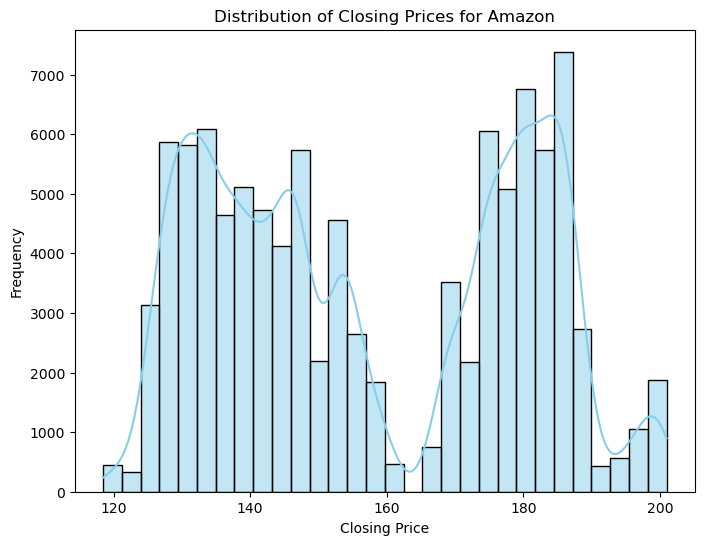

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df_new['close'],bins = 30,kde=True,color='skyblue',edgecolor='black')
plt.title('Distribution of Closing Prices for Amazon')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

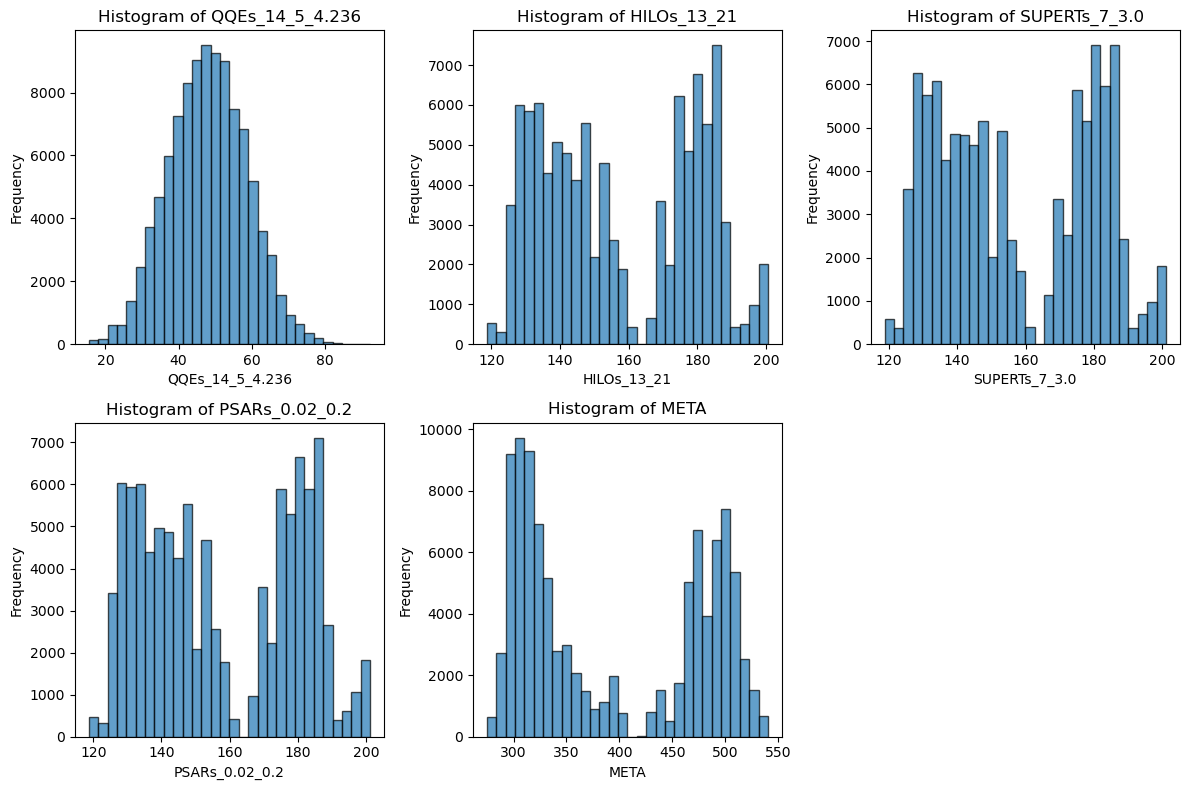

In [11]:
# Columns with nan values
columns_with_nan = ['QQEs_14_5_4.236', 'HILOs_13_21', 'SUPERTs_7_3.0', 'PSARs_0.02_0.2','META']

# Plot histograms for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_with_nan, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_new[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

----------------------------------------

##### Imputation Strategy for QQE Column:

Since the QQE column follows a normal distribution, we will impute missing values using the mean value of the column.

##### KS Test for Distribution Validation:

For the other 3 columns, we will perform a Kolmogorov-Smirnov (KS) test to validate that they follow the same distribution as the target close value of Amazon.


In [12]:
from scipy.stats import ks_2samp
# Filling QQE
QQE_mean = df_new['QQEs_14_5_4.236'].mean()
df_new['QQEs_14_5_4.236'].fillna(QQE_mean,inplace=True)

# Performing the KS test on the other variables
columns_to_test = [ 'HILOs_13_21', 'SUPERTs_7_3.0', 'PSARs_0.02_0.2','META']

for column in columns_to_test:
    target = df_new['close']
    test_col = column

    ks_statistic,p_value = ks_2samp(target,test_col)

    # Interpretation
    sig = 0.05
    if p_value < sig:
        print(f"The distributions are likely different (reject null hypothesis). KS statistic: {ks_statistic}, p-value: {p_value}")
    else:
        print(f"The distributions are likely similar (fail to reject null hypothesis). KS statistic: {ks_statistic}, p-value: {p_value}")


AxisError: axis -1 is out of bounds for array of dimension 0

-------------------
##### It doesn't seem like they follow the same distribution so, for simplicity we can impute using the median for these columns.

In [ ]:
# Calculate medians for each column in columns_to_test
median_vals = df_new[columns_to_test].median()

# Impute missing values using medians
df_new[columns_to_test] = df_new[columns_to_test].fillna(median_vals)

df_new.isna().sum().sum()

-----------------------------
##### No missing values remaining

---------------------
### Handling and detecting outliers

To handle any extreme points and outliers, we are choosing to go with a windsorized approach so as to not remove upper and lower values that can be important within the data. We will pull out those in the bottom and top 1%

In [ ]:
# Function to apply Windsorization
def windsorize(data, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return np.clip(data, lower_bound, upper_bound)

# Apply Windsorization to all numeric columns
df_new = df_new.copy()
for col in df_new.select_dtypes(include=[np.number]).columns:
    df_new[col] = windsorize(df_new[col])

df_new.shape



----------------------------------
### Looking at how well each moving average handles noise.

In [ ]:
# Define the date range
start = '2023-07-11 13:30:00+00:00'
end = '2023-07-11 19:59:00+00:00'

subset_df = df_new[start:end]

# List of moving averages to plot
moving_averages = ['SMA_2', 'SMA_5', 'SMA_7', 'SMA_10', 'SMA_14', 'SMA_30', 'SMA_50', 'SMA_200']

# Set seaborn style
sns.set_style('whitegrid')

# Plotting each moving average against the close price
plt.figure(figsize=(10, 7))

for ma in moving_averages:
    plt.plot(subset_df.index, subset_df['close'], label='Close Price', color='black')
    plt.plot(subset_df.index, subset_df[ma], label=f'{ma}', linewidth=2)

    plt.title(f'Amazon Stock during the first days values with {ma} vs Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.ylim(127, 130)  # Set y-axis limits
    plt.legend()
    plt.tight_layout()
    plt.show()

The SMA-2 closely follows the closing price but may be overly sensitive to rapid changes and noise.

In contrast, the SMA-7 provides a smoother trend and could be used for plotting points and as a basis for peak and valley indicators.

Going forward, the SMA-7 line will be utilized to filter out noise across all data.

---

**Outlier Observations:**

Multiple applications of Windsorization were tested to retain the most variance of the closing price while filtering out extreme values by visualizing the plots above.

**Model Fine-Tuning Consideration:**

Fine-tuning the model may involve addressing outliers in feature columns based on their impact on the overall model.

**Approach:**

Windsorization seems effective for handling outliers, while the SMA is useful for managing noise.



-----------------------
### Duplicate values check and removal

In [ ]:
# Check for duplicate rows
duplicate_rows = df_new[df_new.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

# Optionally, drop duplicate rows
df_new = df_new.drop_duplicates()

In [ ]:
htmldf(df_new.describe())

-------------------------
## Correlation Check

In [13]:
correlation_df = df_new.corr()
htmldf(correlation_df)

In [14]:
import plotly.express as px

# Generate the correlation matrix
correlation_df = df_new.corr()

# Create the interactive heatmap
fig = px.imshow(correlation_df, text_auto=True, color_continuous_scale='blugrn')

# Add title and labels
fig.update_layout(title='Correlation Heatmap', xaxis_title='Features', yaxis_title='Features')

# Show the plot
fig.show()


**Correlation Analysis:**

Looking at the data above, it is evident that many variables are highly correlated with the target column (close).

**Dimensionality Reduction:**

To reduce the dimensionality of the current variables and determine which of them contribute the most to the closing price, the variables with high correlations will be pulled out.

**Further Insight:**

Pulling out these variables and then running further analysis within these can help create new variables.

In [15]:
high_correlation_vars = correlation_df.index[abs(correlation_df['close']) >= 0.5]

# Create a DataFrame with only the filtered variables
filtered_df = df_new[high_correlation_vars]

htmldf(filtered_df.head())

In [16]:
# Feature count before removal
initial_feature_count = len(df_new.columns)

# Feature count after removal
filtered_feature_count = len(filtered_df.columns)

initial_feature_count, filtered_feature_count

(216, 91)

In [17]:
htmldf(filtered_df.corr())

# Step 3: Data Transformation
### 1.Creating New Features before further reduction
### 1. Moving Averages
#### Simple Moving Average (SMA)
Calculate the average of the closing prices over a specified window.
#### Exponential Moving Average (EMA)
Apply an exponential weighting to more recent prices.
### 2. Volatility Indicators
####  Standard Deviation of Returns
Measure the variability in returns.
### 3. Relative Strength Indicators
#### Relative Strength Index (RSI)
Measure the speed and change of price movements.
### 4. Price Differences
#### Daily Price Change
Calculate the difference between the current and previous day's closing price.
#### Percentage Change
Calculate the percentage change in closing price.
### 5. Bollinger Bands
Compute the upper and lower bounds based on the moving average and standard deviation.
### 6. Lag Features
Include past values to help the model predict future values.
### 7. Seasonal Features
Extract the day of the week from the timestamp to identify any day-specific trends.
####  Month
Extract the month to analyze any monthly patterns.

In [18]:
# Initial number of features
initial_features = df_new.shape[1]
print(f"Initial number of features: {initial_features}")

# Adding SMA and EMA features
df_new['SMA_20'] = df_new['close'].rolling(window=20).mean()
df_new['SMA_50'] = df_new['close'].rolling(window=50).mean()
df_new['EMA_20'] = df_new['close'].ewm(span=20, adjust=False).mean()
df_new['EMA_50'] = df_new['close'].ewm(span=50, adjust=False).mean()

# Feature count after adding SMA and EMA
features_after_sma_ema = df_new.shape[1]
print(f"Number of features after adding SMA and EMA: {features_after_sma_ema}")
print("Features added: ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50']")

# Adding Volatility features
df_new['Returns'] = df_new['close'].pct_change()
df_new['Volatility_20'] = df_new['Returns'].rolling(window=20).std()
df_new['Volatility_50'] = df_new['Returns'].rolling(window=50).std()

# Feature count after adding Volatility indicators
features_after_volatility = df_new.shape[1]
print(f"Number of features after adding Volatility indicators: {features_after_volatility}")
print("Features added: ['Returns', 'Volatility_20', 'Volatility_50']")

# Define RSI calculation function
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Adding RSI feature
df_new['RSI_14'] = calculate_rsi(df_new['close'], window=14)

# Feature count after adding RSI
features_after_rsi = df_new.shape[1]
print(f"Number of features after adding RSI: {features_after_rsi}")
print("Feature added: ['RSI_14']")

# Adding Price Change and Percentage Change features
df_new['Price_Change'] = df_new['close'].diff()
df_new['Price_Change_Percent'] = df_new['close'].pct_change() * 100

# Feature count after adding Price Changes
features_after_price_change = df_new.shape[1]
print(f"Number of features after adding Price Changes: {features_after_price_change}")
print("Features added: ['Price_Change', 'Price_Change_Percent']")

# Adding Bollinger Bands features
df_new['Rolling_STD_20'] = df_new['close'].rolling(window=20).std()
df_new['Bollinger_Upper'] = df_new['SMA_20'] + (df_new['Rolling_STD_20'] * 2)
df_new['Bollinger_Lower'] = df_new['SMA_20'] - (df_new['Rolling_STD_20'] * 2)

# Feature count after adding Bollinger Bands
features_after_bollinger = df_new.shape[1]
print(f"Number of features after adding Bollinger Bands: {features_after_bollinger}")
print("Features added: ['Rolling_STD_20', 'Bollinger_Upper', 'Bollinger_Lower']")

# Adding Lagged features
df_new['Lag_1'] = df_new['close'].shift(1)
df_new['Lag_2'] = df_new['close'].shift(2)

# Feature count after adding Lagged features
features_after_lag = df_new.shape[1]
print(f"Number of features after adding Lagged features: {features_after_lag}")
print("Features added: ['Lag_1', 'Lag_2']")

# Adding Day of Week and Month features
df_new['Day_of_Week'] = df_new.index.dayofweek
df_new['Month'] = df_new.index.month

# Feature count after adding Seasonal features
features_after_seasonal = df_new.shape[1]
print(f"Number of features after adding Seasonal features: {features_after_seasonal}")
print("Features added: ['Day_of_Week', 'Month']")

print("Features created and saved successfully.")

Initial number of features: 216
Number of features after adding SMA and EMA: 219
Features added: ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50']
Number of features after adding Volatility indicators: 222
Features added: ['Returns', 'Volatility_20', 'Volatility_50']
Number of features after adding RSI: 222
Feature added: ['RSI_14']
Number of features after adding Price Changes: 224
Features added: ['Price_Change', 'Price_Change_Percent']
Number of features after adding Bollinger Bands: 227
Features added: ['Rolling_STD_20', 'Bollinger_Upper', 'Bollinger_Lower']
Number of features after adding Lagged features: 229
Features added: ['Lag_1', 'Lag_2']
Number of features after adding Seasonal features: 231
Features added: ['Day_of_Week', 'Month']
Features created and saved successfully.


### 2. Transform your features if applicable using techniques such as normalization, scaling or log transformation

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# List of features to transform
features_to_normalize = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Volatility_20', 'Volatility_50']
features_to_standardize = ['RSI_14', 'Price_Change', 'Price_Change_Percent', 'Bollinger_Upper', 'Bollinger_Lower']
features_to_log_transform = ['close']

# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_new[features_to_normalize] = scaler.fit_transform(df_new[features_to_normalize])

# Standardization (Z-Score Scaling)
standard_scaler = StandardScaler()
df_new[features_to_standardize] = standard_scaler.fit_transform(df_new[features_to_standardize])

# Log Transformation
# Adding a small constant (1) to avoid log(0) issues
df_new[features_to_log_transform] = df_new[features_to_log_transform].apply(lambda x: np.log1p(x))

# Verify the transformations
print("\nTransformed Data:")
htmldf(df_new.head())

print("Data transformed and saved successfully.")


Transformed Data:


Data transformed and saved successfully.


### 4. Perform binning, discretization or binarization on your features wherever applicable
### Binning on the 'volume; feature.
Binning: To convert continuous features into bins.
### Discretization on the 'close' feature.
Discretization: To convert continuous features into discrete intervals.
### Binarization on the 'RSI' feature.
Binarization: To convert continuous features into binary categories.


In [20]:
from sklearn.preprocessing import KBinsDiscretizer, Binarizer
from sklearn.impute import SimpleImputer

# Count features before transformation
num_features_before = df_new.shape[1]

# Impute missing values (e.g., with median for numerical features)
imputer = SimpleImputer(strategy='median')
df_new= pd.DataFrame(imputer.fit_transform(df_new), columns=df_new.columns, index=df_new.index)

# 1. Binning "Volume" into 5 equal-sized bins
df_new['Volume_Binned'] = pd.cut(df_new['volume'], bins=5, labels=False)

# 2. Discretization "Close" into 4 quantile-based intervals
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_new['Close_Discretized'] = discretizer.fit_transform(df_new[['close']])

# 3. Binarization of "RSI_14" with a threshold of 50
binarizer = Binarizer(threshold=50)
df_new['RSI_Binarized'] = binarizer.fit_transform(df_new[['RSI_14']])

# Number of features after transformation
num_features_after = df_new.shape[1]

# List of transformed features
transformed_features = ['Volume_Binned', 'Close_Discretized', 'RSI_Binarized']


print(f"Number of features before transformation: {num_features_before}")
print(f"Number of features after transformation: {num_features_after}")
print(f"Transformed features: {transformed_features}")

# Verify the transformations
print("Transformed Data after Binning and Binarization:")
HTML(df_new.head().to_html())


Number of features before transformation: 231
Number of features after transformation: 234
Transformed features: ['Volume_Binned', 'Close_Discretized', 'RSI_Binarized']
Transformed Data after Binning and Binarization:


### 5. Perform feature subset selection using techniques that does not involve developing a model

### Variance Thresholding
#### Remove features with low variance, as they might not provide useful information.

In [21]:
from sklearn.feature_selection import VarianceThreshold

# Set a variance threshold
threshold = 0.01
var_thresh = VarianceThreshold(threshold=threshold)

# Apply variance thresholding
df_var_thresh = df_new.loc[:, var_thresh.fit(df_new).get_support()]

# Number of features before and after variance thresholding
num_features_before_variance = df_new.shape[1]
num_features_after_variance = df_var_thresh.shape[1]

# List of eliminated features
eliminated_features_variance = [col for col in df_new.columns if col not in df_var_thresh.columns]

print(f"Number of features before variance thresholding: {num_features_before_variance}")
print(f"Number of features after variance thresholding: {num_features_after_variance}")
print(f"Eliminated features due to low variance: {eliminated_features_variance}")


Number of features before variance thresholding: 234
Number of features after variance thresholding: 202
Eliminated features due to low variance: ['MACDh_12_26_9', 'ABER_ATR_5_15', 'ABER_ZG_5_15_A_BBL_20_2.0', 'ATRr_14', 'ABER_ZG_5_15_B_BBL_20_2.0', 'BIAS_SMA_26', 'CFO_9', 'CG_10', 'PPOh_12_26_9', 'SMIo_5_20_5', 'SQZ_NO', 'SQZPRO_ON_NARROW', 'SQZPRO_NO', 'TRIX_30_9', 'TRIXs_30_9', 'LOGRET_1', 'PCTRET_1', 'ENTP_10', 'PSARaf_0.02_0.2', 'QS_10', 'NATR_14', 'THERMOma_20_2_0.5', 'Revenue', 'Net_Income', 'Gross_Profit', 'Total_Debt', 'Operating_Cash_Flow', 'Returns', 'Volatility_20', 'Volatility_50', 'Volume_Binned', 'RSI_Binarized']


### Correlation Thresholding
Remove highly correlated features to avoid redundancy.

In [22]:
# Calculate the correlation matrix
corr_matrix = df_var_thresh.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
correlation_threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

# Drop the features
df_corr_thresh = df_var_thresh.drop(columns=to_drop)

# Number of features before and after correlation thresholding
num_features_before_corr = df_var_thresh.shape[1]
num_features_after_corr = df_corr_thresh.shape[1]

# List of eliminated features
eliminated_features_corr = to_drop

print(f"Number of features before correlation thresholding: {num_features_before_corr}")
print(f"Number of features after correlation thresholding: {num_features_after_corr}")
print(f"Eliminated features due to high correlation: {eliminated_features_corr}")
HTML(df_corr_thresh.head().to_html())

Number of features before correlation thresholding: 202
Number of features after correlation thresholding: 84
Eliminated features due to high correlation: ['high', 'low', 'open', 'vwap', 'SMA_10', 'SMA_2', 'SMA_5', 'SMA_7', 'SMA_14', 'SMA_30', 'SMA_50', 'SMA_200', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'ABER_ZG_5_15', 'ABER_SG_5_15', 'ABER_XG_5_15', 'ACCBL_20', 'ACCBM_20', 'ACCBU_20', 'AD', 'ALMA_10_6.0_0.85', 'AMATe_SR_8_21_2', 'AO_5_34', 'OBV', 'OBV_min_2', 'OBV_max_2', 'OBVe_4', 'OBVe_12', 'AOBV_SR_2', 'FISHERTs_9_1', 'D_9_3', 'KST_10_15_20_30_10_10_10_15', 'PPO_12_26_9', 'PPOs_12_26_9', 'ROC_10', 'RVGIs_14_4', 'SMI_5_20_5', 'SMIs_5_20_5', 'SQZ_20_2.0_20_1.5', 'SQZ_OFF', 'SQZPRO_20_2.0_20_2_1.5_1', 'SQZPRO_ON_NORMAL', 'SQZPRO_OFF', 'STCmacd_10_12_26_0.5', 'TSI_13_25_13', 'DEMA_10', 'EMA_10', 'FWMA_10', 'HILO_13_21', 'HILOl_13_21', 'HILOs_13_21', 'HL2', 'HLC3', 'HMA_10', 'HWMA_0.2_0.1_0.1', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'JMA_7_0', 'KAMA_10_2_30', 'LR_14', 'MIDPOI

# Project 2


## 1. Define Your Target Variable and Performance Window
Target Variable: This will be the variable you want to predict. For stock price movements, it could be binary (e.g., 0 for a price decrease, 1 for a price increase) or multi-class (e.g., different levels of price changes). For simplicity, let's start with a binary classification. Performance Window: This defines the period for which you want to predict the price movement. For example, if you're predicting the next day's movement, the performance window is 1 day. Example: Predict whether the stock price will increase or decrease the next day based on historical data.

## 2. Define Your History
History: This is the period of past data used to make predictions. For example, you might use the past 30 days to predict the next day's price movement. Example: Use the last 30 days of stock prices and features to predict whether the price will go up or down on the 31st day.

## 3. Create the Target Variable Column
You need to add a column to your dataset that contains the target value for each record. Assuming you're predicting a binary outcome, you can create this column by comparing the closing prices.

In [23]:
# Assuming `df` is your DataFrame and 'close' is the column with the closing prices
df_new['Target'] = (df_new['close'].shift(-1) > df_new['close']).astype(int)


Here, df['Close'].shift(-1) gets the closing price of the next day. If it's higher than today's price, the target is 1 (price increased); otherwise, it's 0.

## 4. Prepare Your Dataset
Remove any rows where the target variable cannot be computed (e.g., the last row if you're using a shift method).



In [24]:
# Drop the last row since it does not have a target value (shifted out of range)
df_new = df_new[:-1]


## 5. Split Your Dataset
You need to split your dataset into training, validation, and test sets, ensuring that there are no overlaps and that the validation period is separate.



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define features (excluding 'Target')
features = df_new.drop(columns=['Target'])
target = df_new['Target']

# Split the dataset into training, validation, and test sets
# Ensure no overlap between validation and other datasets by setting appropriate time spans
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Check the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (71309, 234) (71309,)
Validation set: (15280, 234) (15280,)
Test set: (15281, 234) (15281,)


#### Logistic Regression:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score  # Import roc_auc_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 1. Training Logistic Regression
log_reg_model = LogisticRegression()

# Define the parameter grid for GridSearchCV
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

print("Training Logistic Regression...")

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV
grid_search_log_reg.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_log_reg_model = grid_search_log_reg.best_estimator_
print(f"Best Parameters for Logistic Regression: {grid_search_log_reg.best_params_}")

# Predict and evaluate on validation set
y_pred_log_reg = best_log_reg_model.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
print(f"Accuracy for Logistic Regression: {accuracy_log_reg}")

# Print classification report
print(classification_report(y_val, y_pred_log_reg, zero_division=0))

# Compute and print ROC-AUC Score
y_pred_proba_log_reg = best_log_reg_model.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class
roc_auc_log_reg = roc_auc_score(y_val, y_pred_proba_log_reg)
print(f"ROC-AUC Score for Logistic Regression: {roc_auc_log_reg}")


Training Logistic Regression...


/Users/christinadarsi/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best Parameters for Logistic Regression: {'C': 0.001, 'solver': 'lbfgs'}
Accuracy for Logistic Regression: 0.55032722513089
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      8409
           1       0.00      0.00      0.00      6871

    accuracy                           0.55     15280
   macro avg       0.28      0.50      0.35     15280
weighted avg       0.30      0.55      0.39     15280

ROC-AUC Score for Logistic Regression: 0.4929499495476143


#### LightGBM:

In [27]:
!pip install lightgbm
import lightgbm as lgb

# LightGBM
lgb_model = lgb.LGBMClassifier()

lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

print("Training LightGBM...")

grid_search_lgb = GridSearchCV(lgb_model, lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train_resampled, y_train_resampled)

best_lgb_model = grid_search_lgb.best_estimator_
print(f"Best Parameters for LightGBM: {grid_search_lgb.best_params_}")

# Predict and evaluate on validation set
y_pred_lgb = best_lgb_model.predict(X_val)
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
print(f"Accuracy for LightGBM: {accuracy_lgb}")

# Classification report
print(classification_report(y_val, y_pred_lgb, zero_division=0))

# ROC-AUC Score
roc_auc_lgb = roc_auc_score(y_val, best_lgb_model.predict_proba(X_val)[:,1])
print(f"ROC-AUC Score for LightGBM: {roc_auc_lgb}")


Training LightGBM...
[LightGBM] [Info] Number of positive: 30688, number of negative: 30689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 56523
[LightGBM] [Info] Number of data points in the train set: 61377, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 -> initscore=-0.000033
[LightGBM] [Info] Start training from score -0.000033
[LightGBM] [Info] Number of positive: 30688, number of negative: 30689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56523
[LightGBM] [Info] Number of data points in the train set: 61377, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499992 

/Users/christinadarsi/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[LightGBM] [Info] Number of positive: 30689, number of negative: 30688
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56520
[LightGBM] [Info] Number of data points in the train set: 61377, number of used features: 224
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000033
[LightGBM] [Info] Start training from score 0.000033
[LightGBM] [Info] Number of positive: 30689, number of negative: 30689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56525
[LightGBM] [Info] Number of data points in the train set: 61378, number of used features: 226
[LightGBM] [Info

/Users/christinadarsi/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



[LightGBM] [Info] Number of positive: 38361, number of negative: 38361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56522
[LightGBM] [Info] Number of data points in the train set: 76722, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Accuracy for LightGBM: 0.6428664921465969
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      8409
           1       0.59      0.65      0.62      6871

    accuracy                           0.64     15280
   macro avg       0.64      0.64      0.64     15280
weighted avg    

#### Decision Tree:

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()

dt_param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Training Decision Tree...")

grid_search_dt = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

best_dt_model = grid_search_dt.best_estimator_
print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")

# Predict and evaluate on validation set
y_pred_dt = best_dt_model.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f"Accuracy for Decision Tree: {accuracy_dt}")

# Classification report
print(classification_report(y_val, y_pred_dt, zero_division=0))

# ROC-AUC Score
roc_auc_dt = roc_auc_score(y_val, best_dt_model.predict_proba(X_val)[:,1])
print(f"ROC-AUC Score for Decision Tree: {roc_auc_dt}")


Training Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.5429973821989529
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      8409
           1       0.49      0.54      0.51      6871

    accuracy                           0.54     15280
   macro avg       0.54      0.54      0.54     15280
weighted avg       0.55      0.54      0.54     15280

ROC-AUC Score for Decision Tree: 0.5206960703665614


#### Random Forest:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Initialize Random Forest model
rf_model = RandomForestClassifier(class_weight=class_weights_dict, n_jobs=-1, random_state=42)

# Simplified parameter grid for faster training
rf_param_grid = {
    'n_estimators': [50, 100],  # Fewer estimators
    'max_depth': [10, 20],      # Fewer depth levels
    'min_samples_split': [2, 5]
}

print("Training Random Forest...")

# Grid search with simplified parameter grid
grid_search_rf = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Predict and evaluate on validation set
y_pred_rf = best_rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf}")

# Classification report
print(classification_report(y_val, y_pred_rf, zero_division=0))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_val, best_rf_model.predict_proba(X_val)[:,1])
print(f"ROC-AUC Score for Random Forest: {roc_auc_rf}")


Training Random Forest...
[LightGBM] [Info] Number of positive: 30689, number of negative: 30689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50632
[LightGBM] [Info] Number of data points in the train set: 61378, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 30689, number of negative: 30689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56524
[LightGBM] [Info] Number of data points in the train set: 61378, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of 

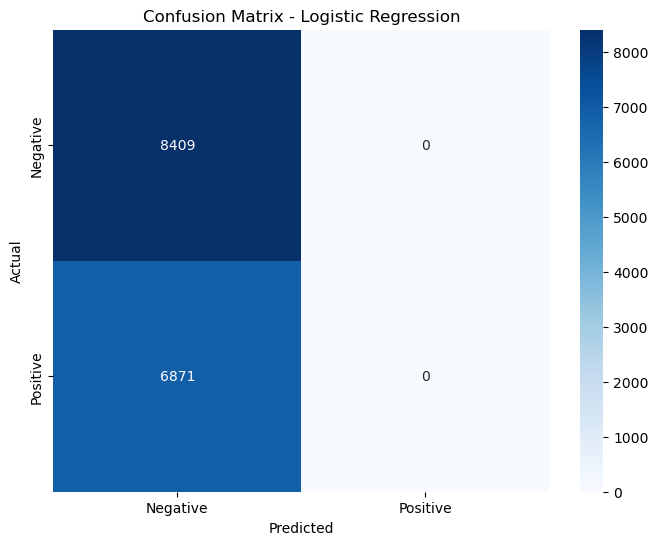

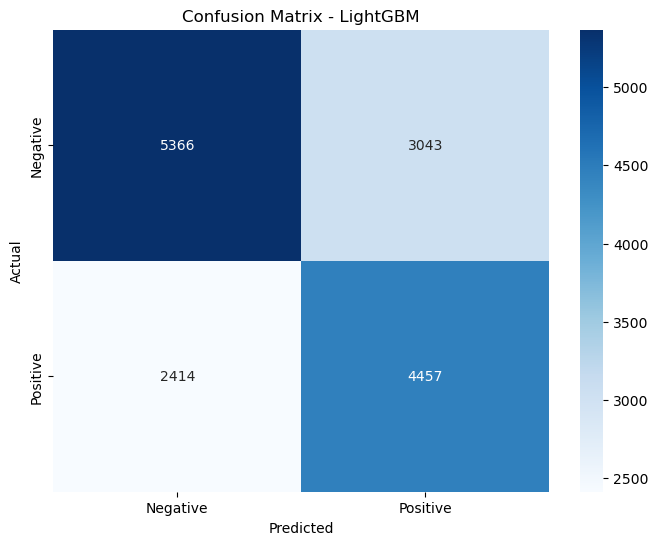

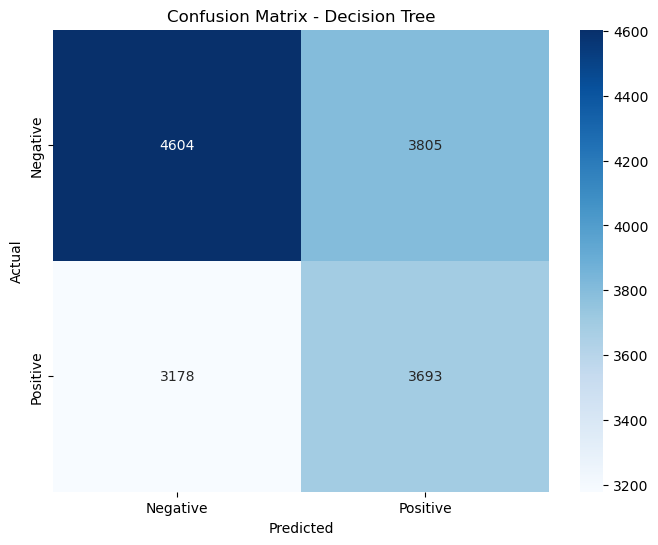

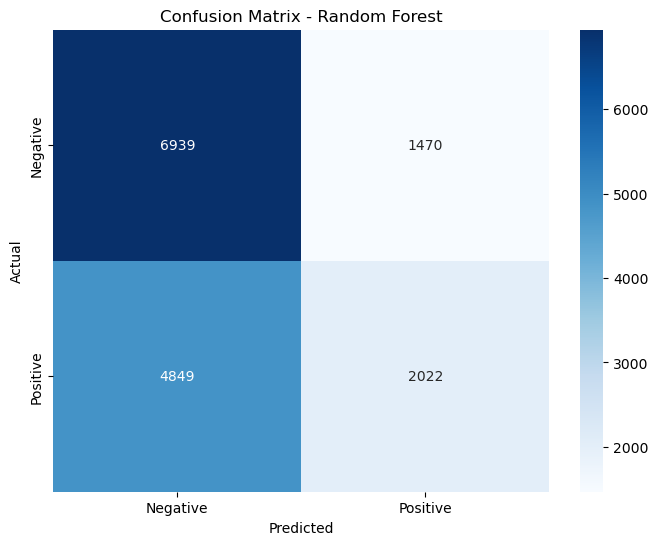


Logistic Regression Metrics:
Accuracy: 0.55032722513089
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      8409
           1       0.00      0.00      0.00      6871

    accuracy                           0.55     15280
   macro avg       0.28      0.50      0.35     15280
weighted avg       0.30      0.55      0.39     15280


LightGBM Metrics:
Accuracy: 0.6428664921465969
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      8409
           1       0.59      0.65      0.62      6871

    accuracy                           0.64     15280
   macro avg       0.64      0.64      0.64     15280
weighted avg       0.65      0.64      0.64     15280


Decision Tree Metrics:
Accuracy: 0.5429973821989529
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      8409
           1       0.49      0.54      0.51      6871

    accuracy            

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_val, y_pred_log_reg, 'Logistic Regression')
plot_confusion_matrix(y_val, y_pred_lgb, 'LightGBM')
plot_confusion_matrix(y_val, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_val, y_pred_rf, 'Random Forest')

# Print evaluation metrics for each model
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_log_reg}")
print(classification_report(y_val, y_pred_log_reg, zero_division=0))

print("\nLightGBM Metrics:")
print(f"Accuracy: {accuracy_lgb}")
print(classification_report(y_val, y_pred_lgb, zero_division=0))

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(classification_report(y_val, y_pred_dt, zero_division=0))

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(classification_report(y_val, y_pred_rf, zero_division=0))
print(f"ROC-AUC Score: {roc_auc_rf}")

# Compare the models
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"LightGBM Accuracy: {accuracy_lgb}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest ROC-AUC Score: {roc_auc_rf}")

# Discuss strengths and weaknesses
print("\nModel Discussion:")
print("1. Logistic Regression: Quick to train, interpretable, but may underperform if the data is complex and non-linear.")
print("2. LightGBM: Generally performs well with large datasets and handles class imbalance better, but can be more complex to tune.")
print("3. Decision Tree: Easy to interpret, but may overfit the data.")
print("4. Random Forest: Good performance with complex data and handles overfitting better than Decision Tree, but can be slow with large datasets.")



### Justification based on metrics and analysis
Best Model: LightGBM stands out as the best model based on accuracy and balanced performance across classes. It handles class imbalance better and has a good overall performance.

Training XGBoost...
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy for XGBoost: 0.6347513089005236
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      8409
           1       0.59      0.63      0.61      6871

    accuracy                           0.63     15280
   macro avg       0.63      0.63      0.63     15280
weighted avg       0.64      0.63      0.64     15280

ROC-AUC Score for XGBoost: 0.6835930738560585


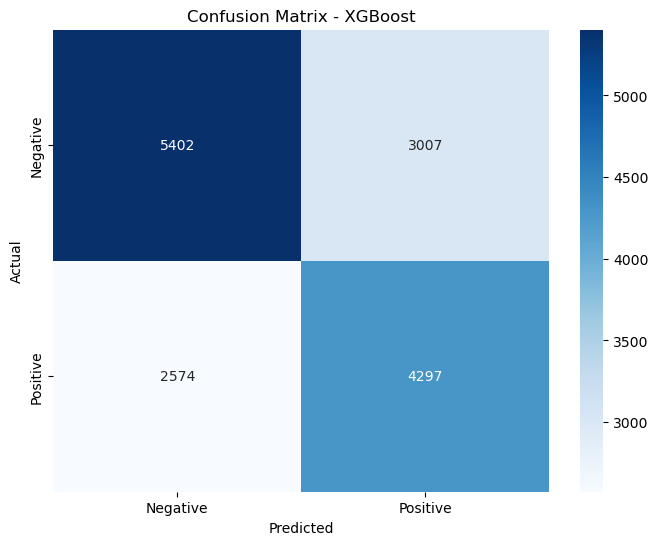

In [31]:
!pip install xgboost

# Step 1: Import Necessary Libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Step 2: Apply SMOTE to Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Initialize and Train XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Define the parameter grid for hyperparameter tuning --- reduced parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [ 0.8]
}

print("Training XGBoost...")

# Perform grid search with cross-validation to find the best parameters
grid_search_xgb = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best model from grid search
best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")

# Step 4: Predict and Evaluate on Validation Set
y_pred_xgb = best_xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"Accuracy for XGBoost: {accuracy_xgb}")

# Classification Report
print(classification_report(y_val, y_pred_xgb, zero_division=0))

# ROC-AUC Score
y_pred_proba_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)
print(f"ROC-AUC Score for XGBoost: {roc_auc_xgb}")

# Step 5: Plot Confusion Matrix (Optional)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_val, y_pred_xgb, 'XGBoost')
